In [1]:
import numpy as np # numerical computation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plotting package

# for rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high res figures

In [2]:
df = pd.read_csv('data/default_of_clients_cleaned')

In [3]:
df.head(10)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,ceae2946-47e4,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,...,221,-159,567,380,601,0,581,1687,1542,0
8,8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
df['default payment next month'].mean()

0.21920753178398014

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    21065
1     5914
Name: ID, dtype: int64

In [6]:
# apply logistic regression 
# .fit trains models
# .predict makes predictions
from sklearn.linear_model import LogisticRegression # choose logistic regression
# instantiating it from the class provided by scikit-learn
my_lr = LogisticRegression() # instantiate the object into a class
my_lr # output displays default options that go with logistic regression model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                               intercept_scaling=1, l1_ratio=None, max_iter=100,
                              multi_class='warn', n_jobs=None, penalty='l2',
                              random_state=None, solver='warn', tol=0.0001, verbose=0,
                              warm_start=False)
my_new_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# sets two options and displays current state of the model object
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# shows the values of EDUCATION feature for the first 10 samples
x = df['EDUCATION'][0:10].values.reshape(-1, 1)
x

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [10]:
# first 10 values of the response variable
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
my_new_lr.fit(x, y) # trains the model my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# lets us select and view new features from the data in new_X
new_X = df['EDUCATION'][10:20].values.reshape(-1, 1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [13]:
# make predictions using .predict on the model
my_new_lr.predict(new_X) # the predictions on the new feature

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
# view what the true values to each prediction is 
df['default payment next month'][10:20].values # shows the true value for each prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
# use numpy's random feature to generate synthetic data
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [16]:
# Create data for linear regression
# The following code will let us create linear data with Guassian Noise
np.random.seed(seed=1)
slope=0.25
intercept = -1.25
# similar to y = mx + b in linear algebra 
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept 

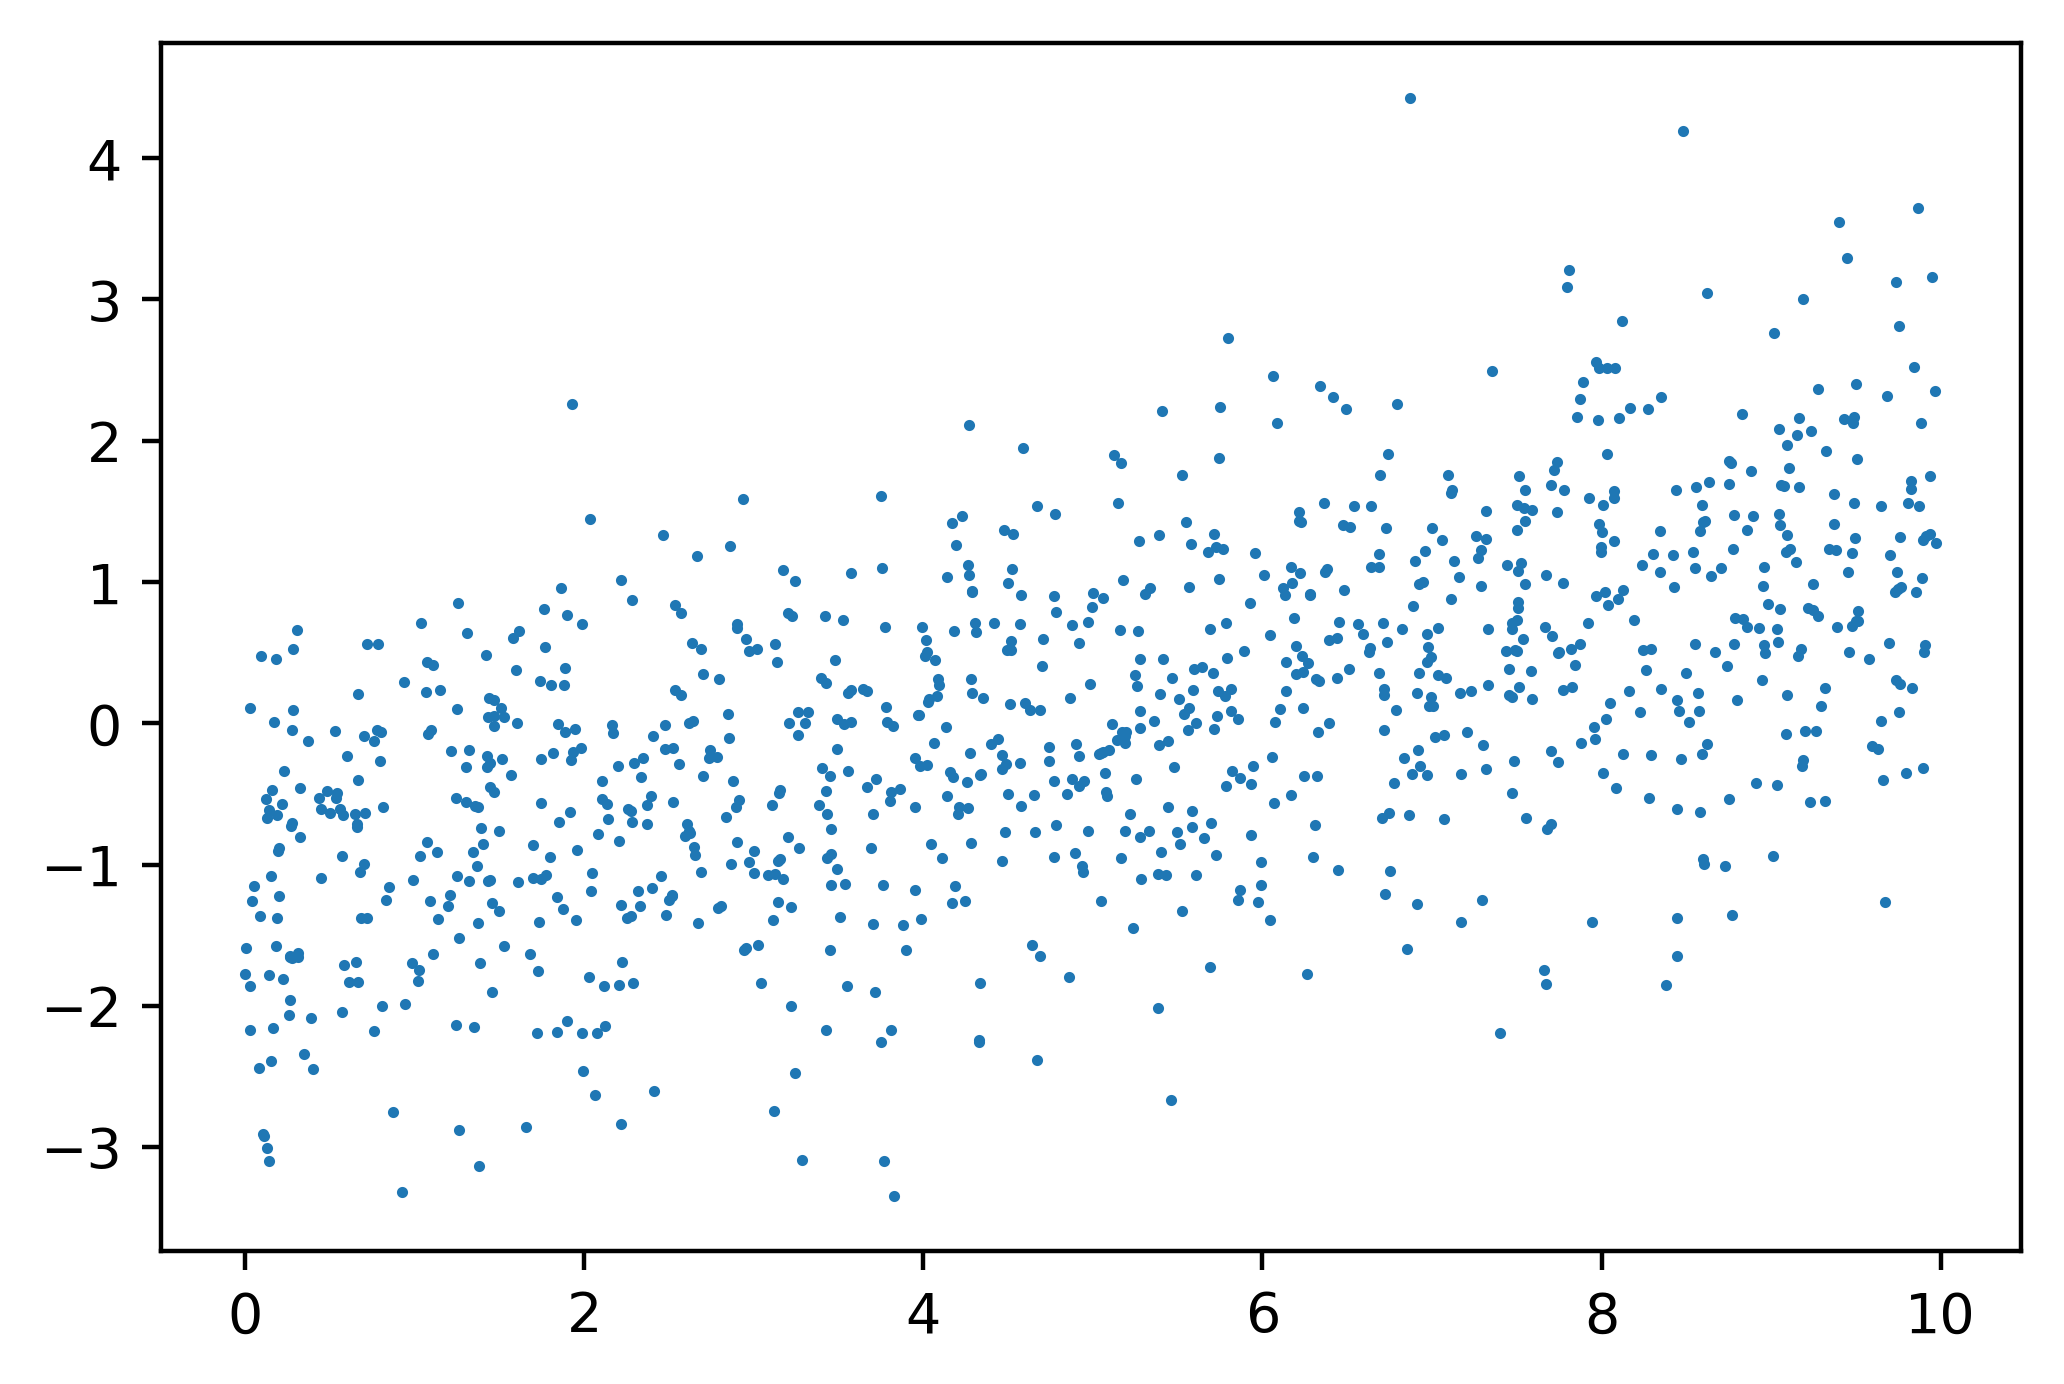

In [17]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X, y, s=1)

Exercise 8: Linear Regression in Scikit-learn

In [18]:
# Import Linear Regression Class and Instantiate it 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Fit the model and examine the coefficients 
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_) # for intercept
print(lin_reg.coef_) # for slope 

-1.161256600282589
[0.24002588]


In [20]:
# Make predictions on the linear regression class
# Notice how the .predict method takes X as input and outputs y
y_pred = lin_reg.predict(X.reshape(-1, 1))

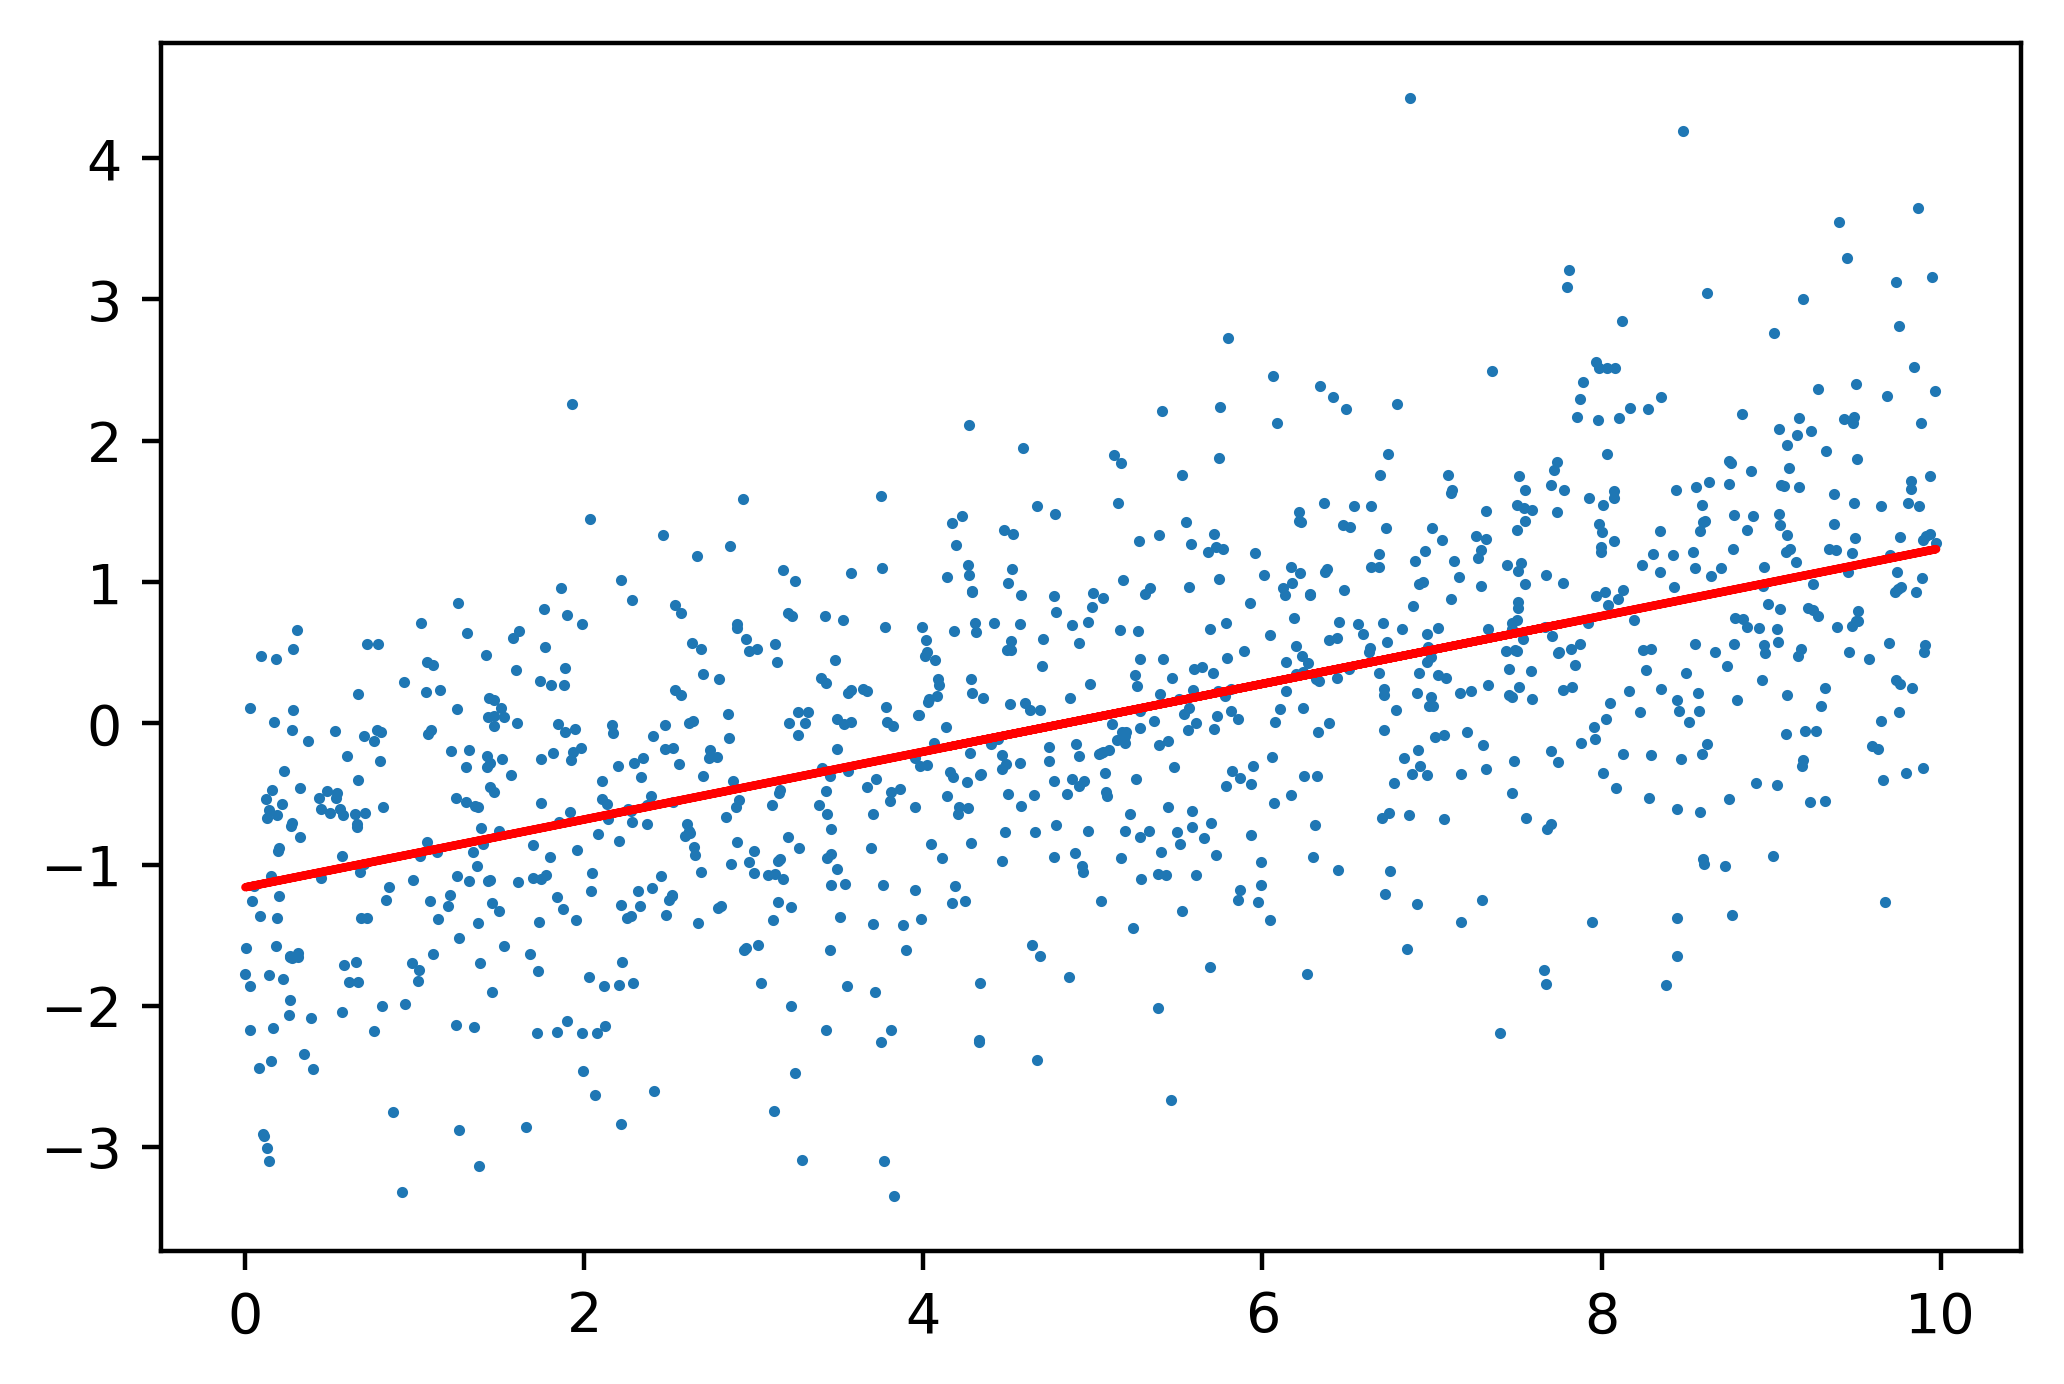

In [21]:
# plots the raw data and fitted model predictions on the data
# In other words, it plots the line of best fit for our data
plt.scatter(X, y, s=1) # plots the points 
plt.plot(X, y_pred, 'r') # plots the line of best fit

In [22]:
# Testing the data
# When testing the data it is good to take %80 for training and %20 for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size = 0.2, random_state=24)

In [23]:
# Examine shapes of our training and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21583, 1)
(5396, 1)
(21583,)
(5396,)


In [24]:
print(np.mean(y_train))
print(np.mean(y_test))

0.21970995691053144
0.21719792438843588


Creating a model for Classification Accuracy
Fitting an example model, to illustrate binary classification metrics

In [25]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression()
example_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='warn',
                                n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                                tol=0.0001, verbose=0, warm_start=False)

In [27]:
example_lr.fit(X_train, y_train) # train model with labeled data from data set

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = example_lr.predict(X_test) # stored model-predicted labels of the test in y_pred

In [29]:
# Need to calculate accuracy (which samples were correctly classified)
is_correct = y_pred == y_test # this creates a boolean mask of the data set

In [30]:
# get the mean of the boolean mask data set
np.mean(is_correct) # model is correct 78% of the time

0.7828020756115641

In [31]:
# can use .score() to get accuracy model
example_lr.score(X_test, y_test)  

0.7828020756115641

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test, y_pred) # faster way to calculate accuracy of model

0.7828020756115641

Exercise 9 Calculate True and False Positives, Confusion Mantrix in Python

In [34]:
# Calculate number of positive samples 
P = sum(y_test)
P

1172

In [35]:
# Calculate the number of true positives
# True positives - positive samples that are true with test data and positive
# with sample data
TP = sum ( (y_test==1) & (y_pred==1))
TP

0

In [36]:
# True Positive rate is true positives / positives
TPR = TP/P
TPR

0.0

In [37]:
# Calculate the number of False Negatives
# False Negative - predicted data is false but test data is true
# Or we thought that the result would be false but it is actually true
FN = sum( (y_test==1) & (y_pred==0))
FN

1172

In [38]:
# Calculate False negative Rate
# False Negative Rate = False Negative / Sample Population
FNR = FN/P
FNR

1.0

True Positive and False Negative Rates Sum to one. TPR = 0 FPR = 1
Every positive sample was predicted to be negative, so none were correctly predicted

In [39]:
N = sum(y_test==0) # calculate the negative
N

4224

In [40]:
TN = sum( (y_test==0) & (y_pred==0)) # calculate the true negative
TN

4224

In [41]:
FP = sum( (y_test==0) & (y_pred==1)) # calculate the false positive
FP

0

In [42]:
TNR = TN / N # True negative rate is True Negative / Negatives
FPR = FP / N # False positive rate is False Positive / Negatives
print("True negative rate: {} False Positive Rate {}".format(TNR, FPR))

True negative rate: 1.0 False Positive Rate 0.0


In [43]:
# Create a confusion matrix with scikit-learn 
metrics.confusion_matrix(y_test, y_pred)

array([[4224,    0],
       [1172,    0]], dtype=int64)

Exercise 10: Obtaining Predicted Probabilities from a Trained From a Trained Logisitc Regression Model

In [44]:
# We can access predicted probabilities of these samples with .predict_proba
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.75902573, 0.24097427],
       [0.77700942, 0.22299058],
       [0.75902573, 0.24097427],
       ...,
       [0.79401522, 0.20598478],
       [0.79401522, 0.20598478],
       [0.77700942, 0.22299058]])

In [45]:
# Calculate the sum of predicted probabilities for each sample
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
prob_sum.shape

(5396,)

In [47]:
# See all unique array elements in the code 
np.unique(prob_sum)

array([1.])

In [48]:
# Puts the second column of predicted probabilities array in an array
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.24097427, 0.22299058, 0.24097427, ..., 0.20598478, 0.20598478,
       0.22299058])

(array([  67., 1877., 2524.,    0.,  844.,    0.,   16.,    0.,   56.,
          12.]),
 array([0.18995882, 0.20102355, 0.21208828, 0.22315301, 0.23421774,
        0.24528247, 0.2563472 , 0.26741193, 0.27847666, 0.28954139,
        0.30060612]),
 <a list of 10 Patch objects>)

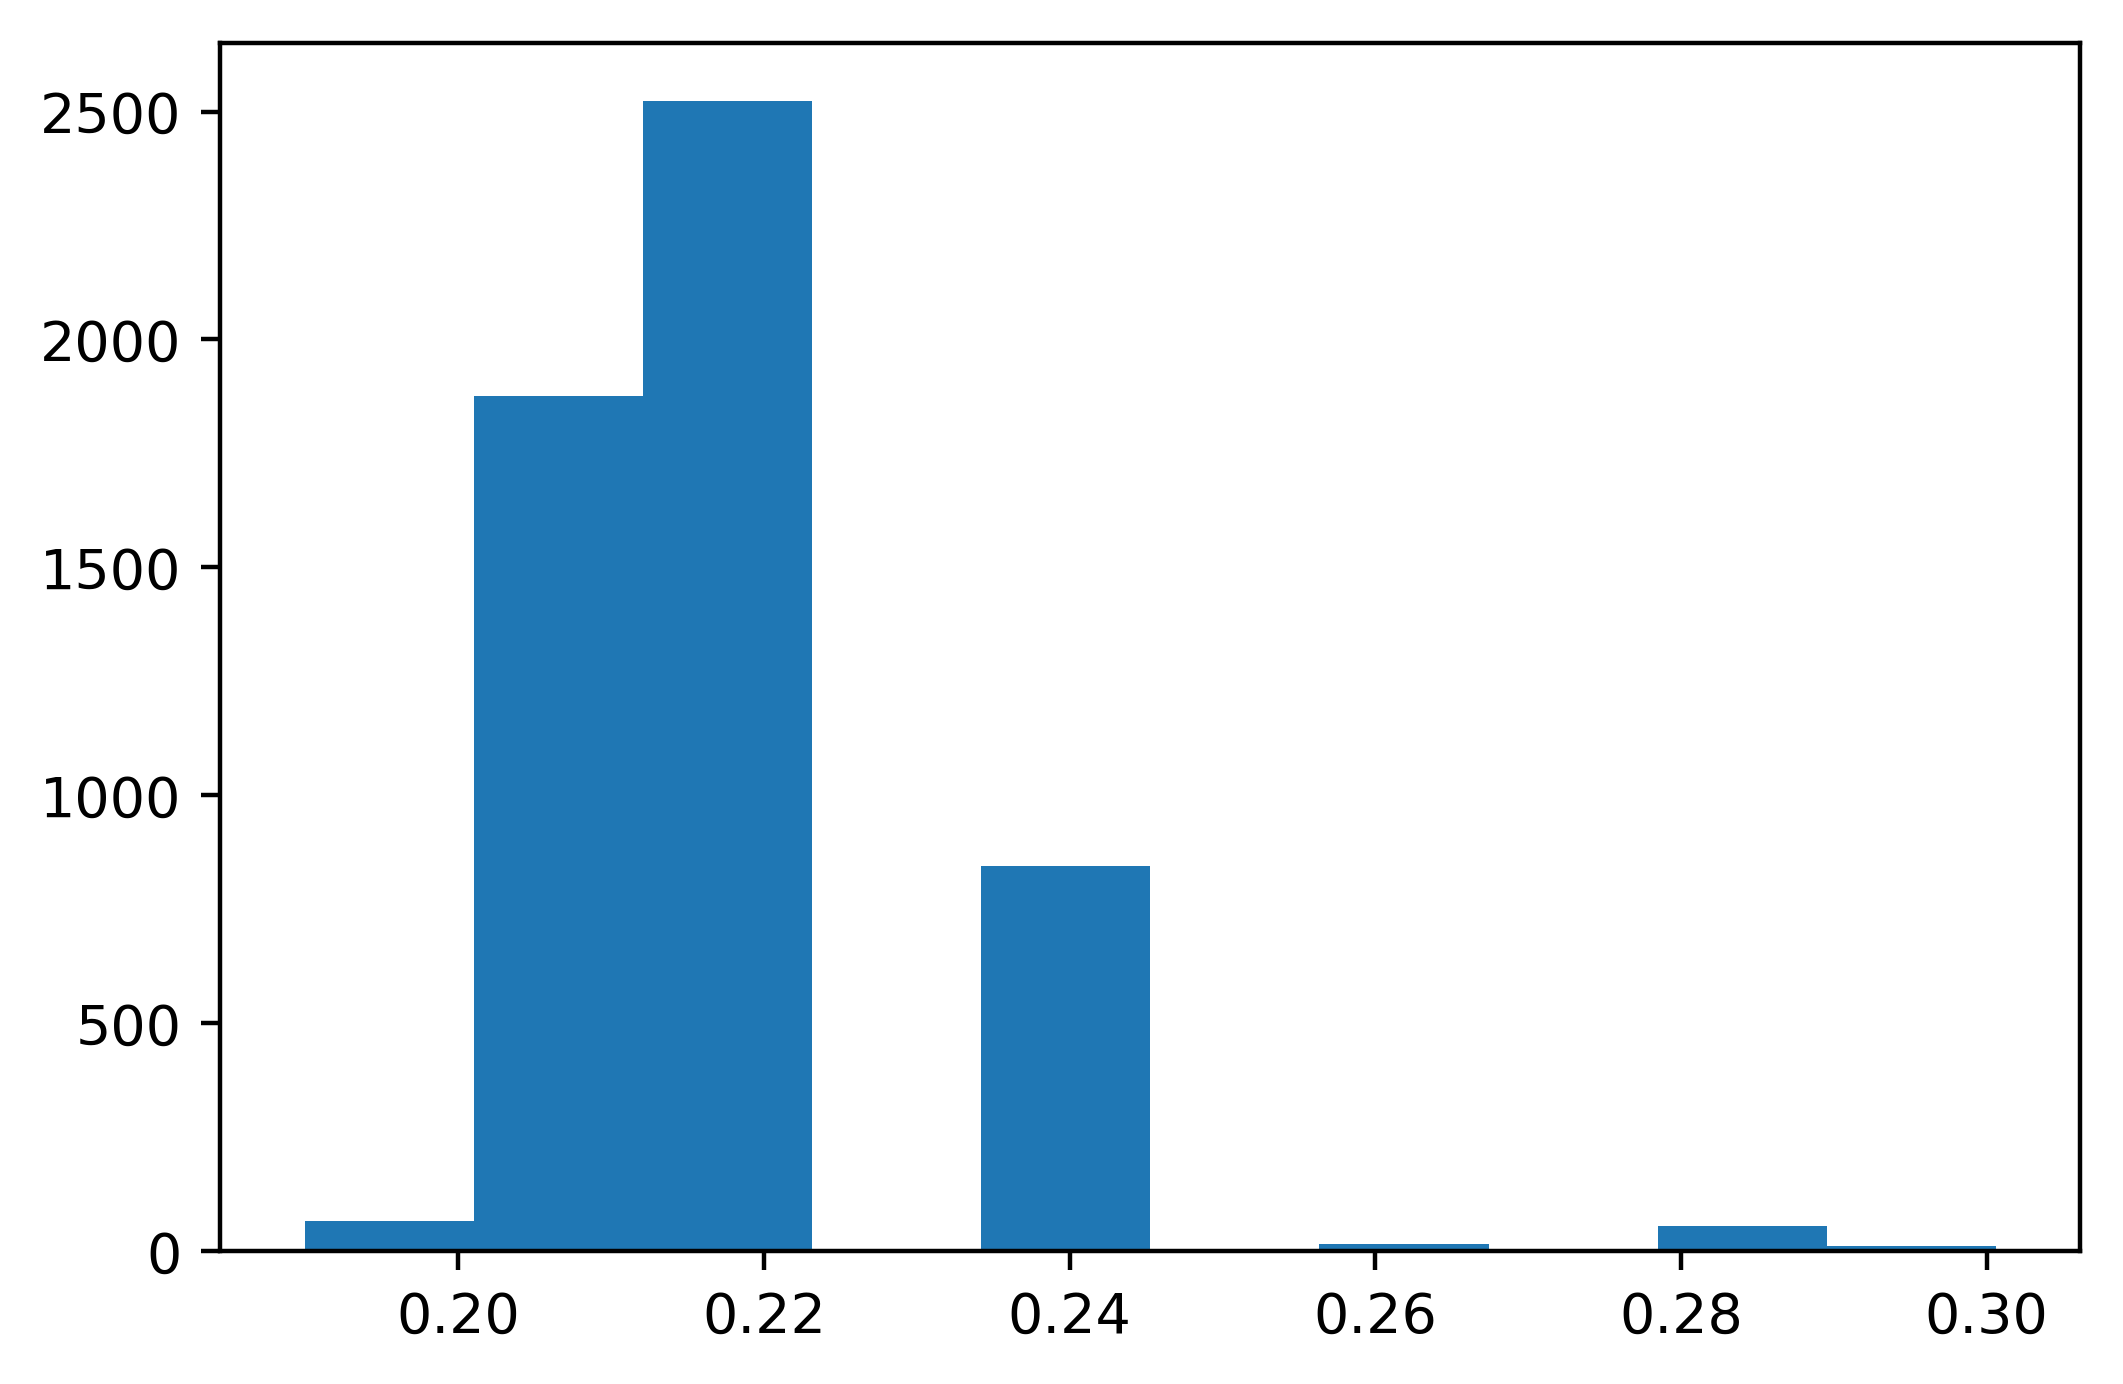

In [49]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of Samples')

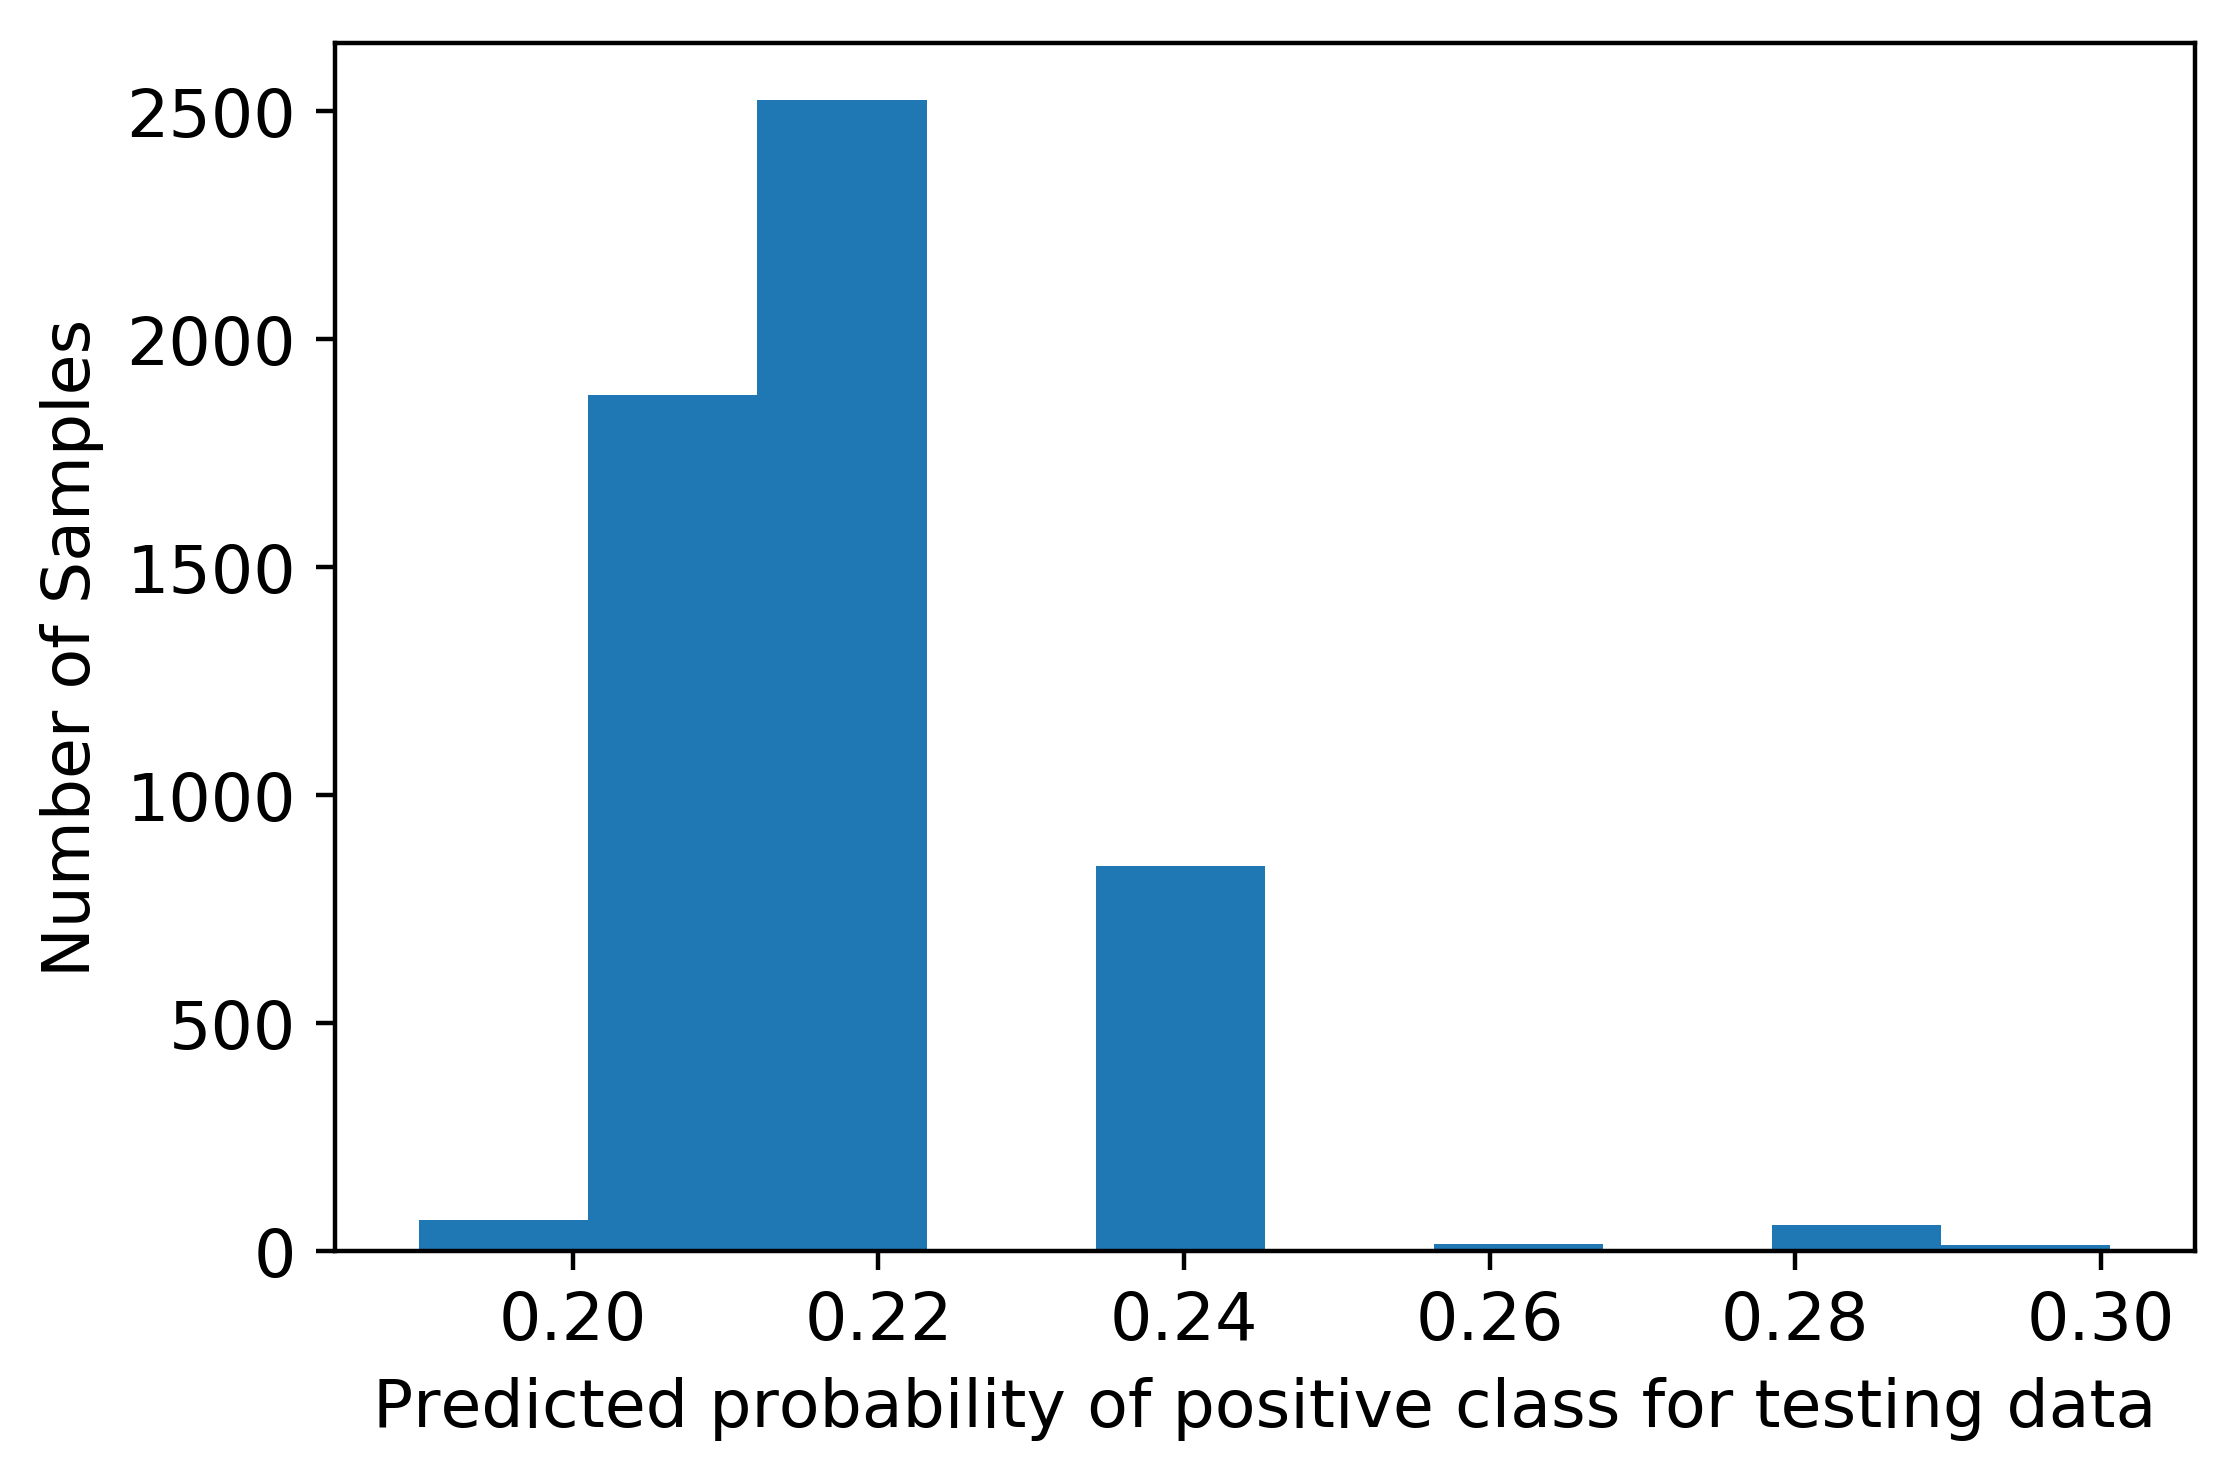

In [50]:
# Formatted Histogram plot of predicted possibilities
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of Samples')